In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('fr.2.csv')

print(data.head())


       Round             Date            Team 1   FT                  Team 2
0  Journée 1  Sat Aug 22 2020       Toulouse FC  0-1           USL Dunkerque
1  Journée 1  Sat Aug 22 2020        AC Ajaccio  0-1          LB Châteauroux
2  Journée 1  Sat Aug 22 2020        AJ Auxerre  0-2  FC Sochaux-Montbéliard
3  Journée 1  Sat Aug 22 2020  Clermont Foot 63  0-0     Stade Malherbe Caen
4  Journée 1  Sat Aug 22 2020       EA Guingamp  0-1     Chamois Niortais FC


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(data['FT'].isnull().sum())

print(data['FT'].unique())


282
['0-1' '0-2' '0-0' '0-3' '3-0' '1-0' '2-0' '2-2' '1-1' '2-1' '5-3' '1-2'
 '1-3' '3-1' '5-1' '3-2' '4-0' '4-1' nan '0-4' '3-4' '4-5']


In [ ]:
data.dropna(subset=['FT'], inplace=True)

In [ ]:
print(data['FT'].isnull().sum())

0


In [ ]:
data[['Goals_Team_1', 'Goals_Team_2']] = data['FT'].str.split('-', expand=True).astype(int)

print(data.head())


       Round             Date            Team 1   FT                  Team 2  \
0  Journée 1  Sat Aug 22 2020       Toulouse FC  0-1           USL Dunkerque   
1  Journée 1  Sat Aug 22 2020        AC Ajaccio  0-1          LB Châteauroux   
2  Journée 1  Sat Aug 22 2020        AJ Auxerre  0-2  FC Sochaux-Montbéliard   
3  Journée 1  Sat Aug 22 2020  Clermont Foot 63  0-0     Stade Malherbe Caen   
4  Journée 1  Sat Aug 22 2020       EA Guingamp  0-1     Chamois Niortais FC   

   Goals_Team_1  Goals_Team_2  
0             0             1  
1             0             1  
2             0             2  
3             0             0  
4             0             1  


In [ ]:
total_goals_team_1 = data.groupby('Team 1')['Goals_Team_1'].sum()
total_goals_team_2 = data.groupby('Team 2')['Goals_Team_2'].sum()

total_goals = total_goals_team_1.add(total_goals_team_2, fill_value=0)
total_goals = total_goals.reset_index(name='Total Goals')

print(total_goals)

                    Team 1  Total Goals
0               AC Ajaccio            6
1               AJ Auxerre           18
2        AS Nancy Lorraine           10
3                Amiens SC            6
4      Chamois Niortais FC           14
5         Clermont Foot 63           12
6              EA Guingamp            7
7             ES Troyes AC           15
8               FC Chambly            8
9   FC Sochaux-Montbéliard           13
10        Grenoble Foot 38           13
11          LB Châteauroux            8
12             Le Havre AC            9
13                Paris FC           18
14                  Pau FC            9
15                Rodez AF            8
16     Stade Malherbe Caen            9
17             Toulouse FC           16
18           USL Dunkerque            7
19         Valenciennes FC           12


In [ ]:
wins = pd.DataFrame(data['Team 1'].unique(), columns=['Team'])
wins['Wins'] = 0
wins['Losses'] = 0

for index, row in data.iterrows():
    if row['Goals_Team_1'] > row['Goals_Team_2']:
        wins.loc[wins['Team'] == row['Team 1'], 'Wins'] += 1
        wins.loc[wins['Team'] == row['Team 2'], 'Losses'] += 1
    elif row['Goals_Team_1'] < row['Goals_Team_2']:
        wins.loc[wins['Team'] == row['Team 2'], 'Wins'] += 1
        wins.loc[wins['Team'] == row['Team 1'], 'Losses'] += 1

print(wins)


                      Team  Wins  Losses
0              Toulouse FC     4       3
1               AC Ajaccio     3       6
2               AJ Auxerre     5       4
3         Clermont Foot 63     4       2
4              EA Guingamp     3       4
5               FC Chambly     1       6
6          Valenciennes FC     4       4
7                 Rodez AF     2       5
8                Amiens SC     3       5
9             ES Troyes AC     5       2
10       AS Nancy Lorraine     3       4
11     Stade Malherbe Caen     5       3
12             Le Havre AC     5       4
13     Chamois Niortais FC     5       2
14                Paris FC     8       1
15                  Pau FC     2       5
16  FC Sochaux-Montbéliard     3       2
17        Grenoble Foot 38     5       3
18          LB Châteauroux     2       6
19           USL Dunkerque     4       5


In [ ]:
print(total_goals.columns)


Index(['Team 1', 'Total Goals'], dtype='object')


In [ ]:
total_goals_team_1 = data.groupby('Team 1')['Goals_Team_1'].sum().reset_index()

total_goals_team_1.columns = ['Team', 'Total Goals']

total_goals_team_2 = data.groupby('Team 2')['Goals_Team_2'].sum().reset_index()

total_goals_team_2.columns = ['Team', 'Total Goals']

total_goals_combined = pd.concat([total_goals_team_1, total_goals_team_2])

total_goals = total_goals_combined.groupby('Team')['Total Goals'].sum().reset_index()

print(total_goals)


                      Team  Total Goals
0               AC Ajaccio            6
1               AJ Auxerre           18
2        AS Nancy Lorraine           10
3                Amiens SC            6
4      Chamois Niortais FC           14
5         Clermont Foot 63           12
6              EA Guingamp            7
7             ES Troyes AC           15
8               FC Chambly            8
9   FC Sochaux-Montbéliard           13
10        Grenoble Foot 38           13
11          LB Châteauroux            8
12             Le Havre AC            9
13                Paris FC           18
14                  Pau FC            9
15                Rodez AF            8
16     Stade Malherbe Caen            9
17             Toulouse FC           16
18           USL Dunkerque            7
19         Valenciennes FC           12


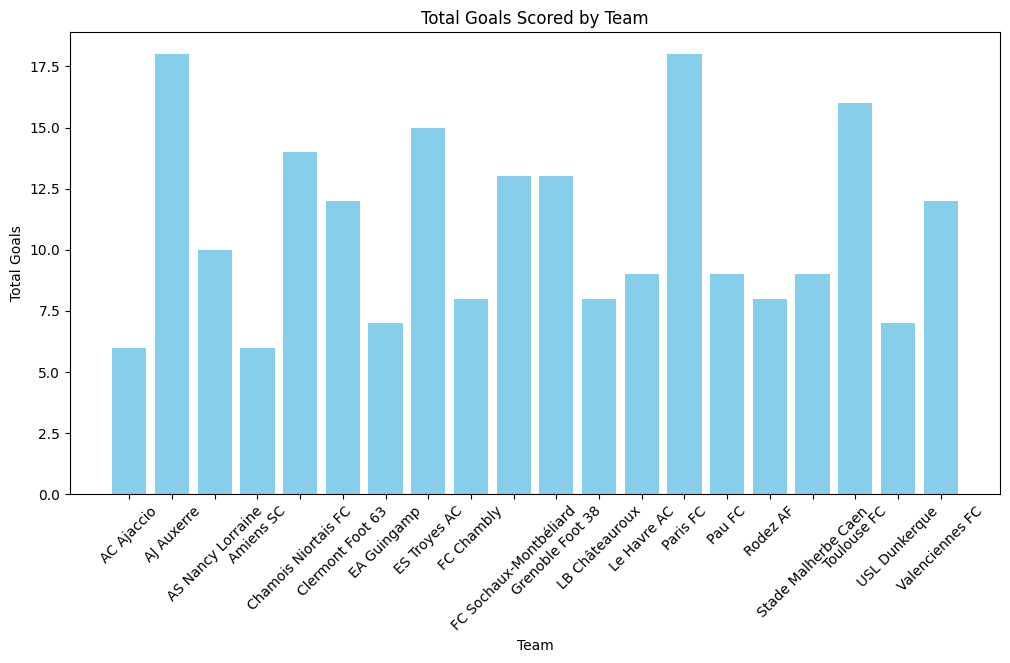

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(total_goals['Team'], total_goals['Total Goals'], color='skyblue')
plt.title('Total Goals Scored by Team')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()


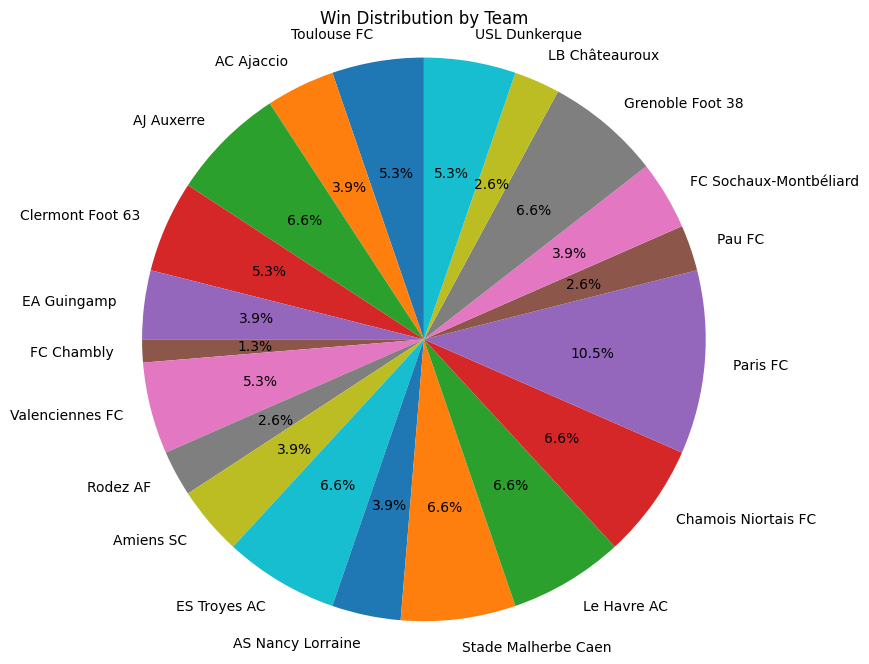

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(wins['Wins'], labels=wins['Team'], autopct='%1.1f%%', startangle=90)
plt.title('Win Distribution by Team')
plt.axis('equal')
plt.show()


In [ ]:
total_goals.to_csv('total_goals_per_team.csv', index=False)

wins.to_csv('wins_losses_per_team.csv', index=False)
